<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [4]:
from sklearn.metrics import roc_auc_score
    
    
    
    
y_true = [
    0,
    1,
    1,
    0,
    1
]
                                
y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [460]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [461]:
data = pd.read_csv('./train.csv')

In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [463]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3250,14,50.75,712.75,Male,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3654,58,68.40,3972.25,Female,0,Yes,No,Yes,Yes,DSL,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,0
2563,8,19.65,164.3,Female,1,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,1
134,5,93.90,486.85,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,1
3954,69,19.95,1399.35,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
55,51,96.40,4911.05,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,One year,Yes,Credit card (automatic),0
1728,61,93.70,5860.7,Female,0,Yes,No,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,No,Bank transfer (automatic),0
300,28,92.35,2602.9,Female,0,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,1
5253,53,77.40,4155.95,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),0
3126,18,74.15,1345.75,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


In [464]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [465]:
data[cat_cols] = data[cat_cols].astype('category')
for col in num_cols:
	data[col] = pd.to_numeric(data[col], errors='coerce')

data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

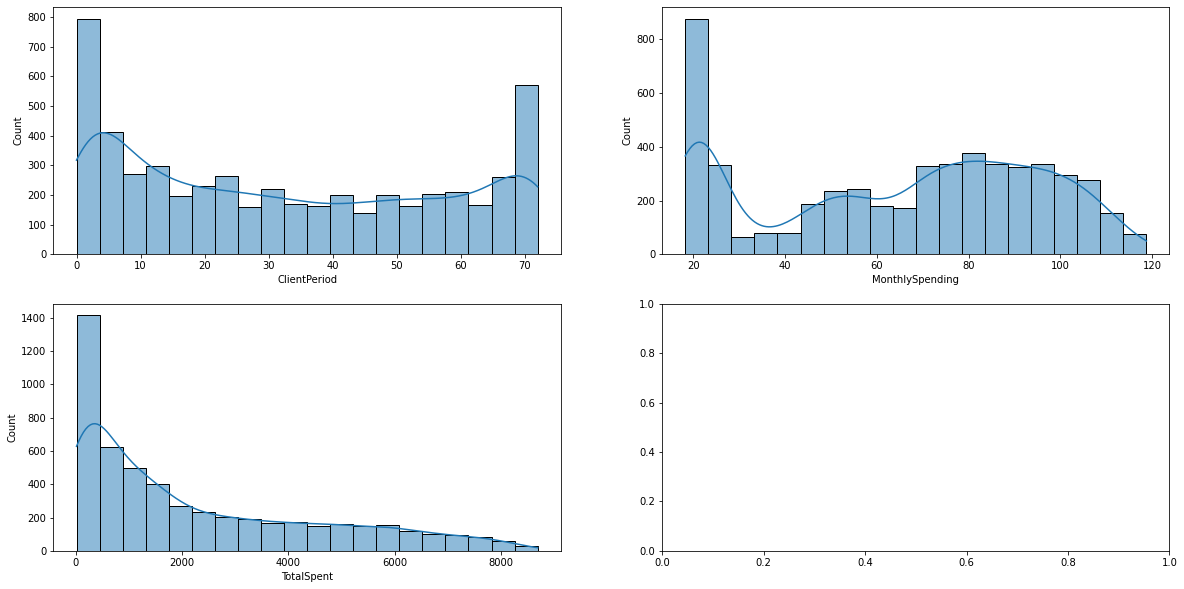

In [298]:
n_num_cols = len(num_cols)
col_wrap = 2
fig, ax = plt.subplots((n_num_cols + col_wrap - 1) // col_wrap, col_wrap, figsize=(20, 10))
for ax, col in zip(ax.flatten(), num_cols):
	sns.histplot(data=data, x=col, bins=20, kde=True, ax=ax)

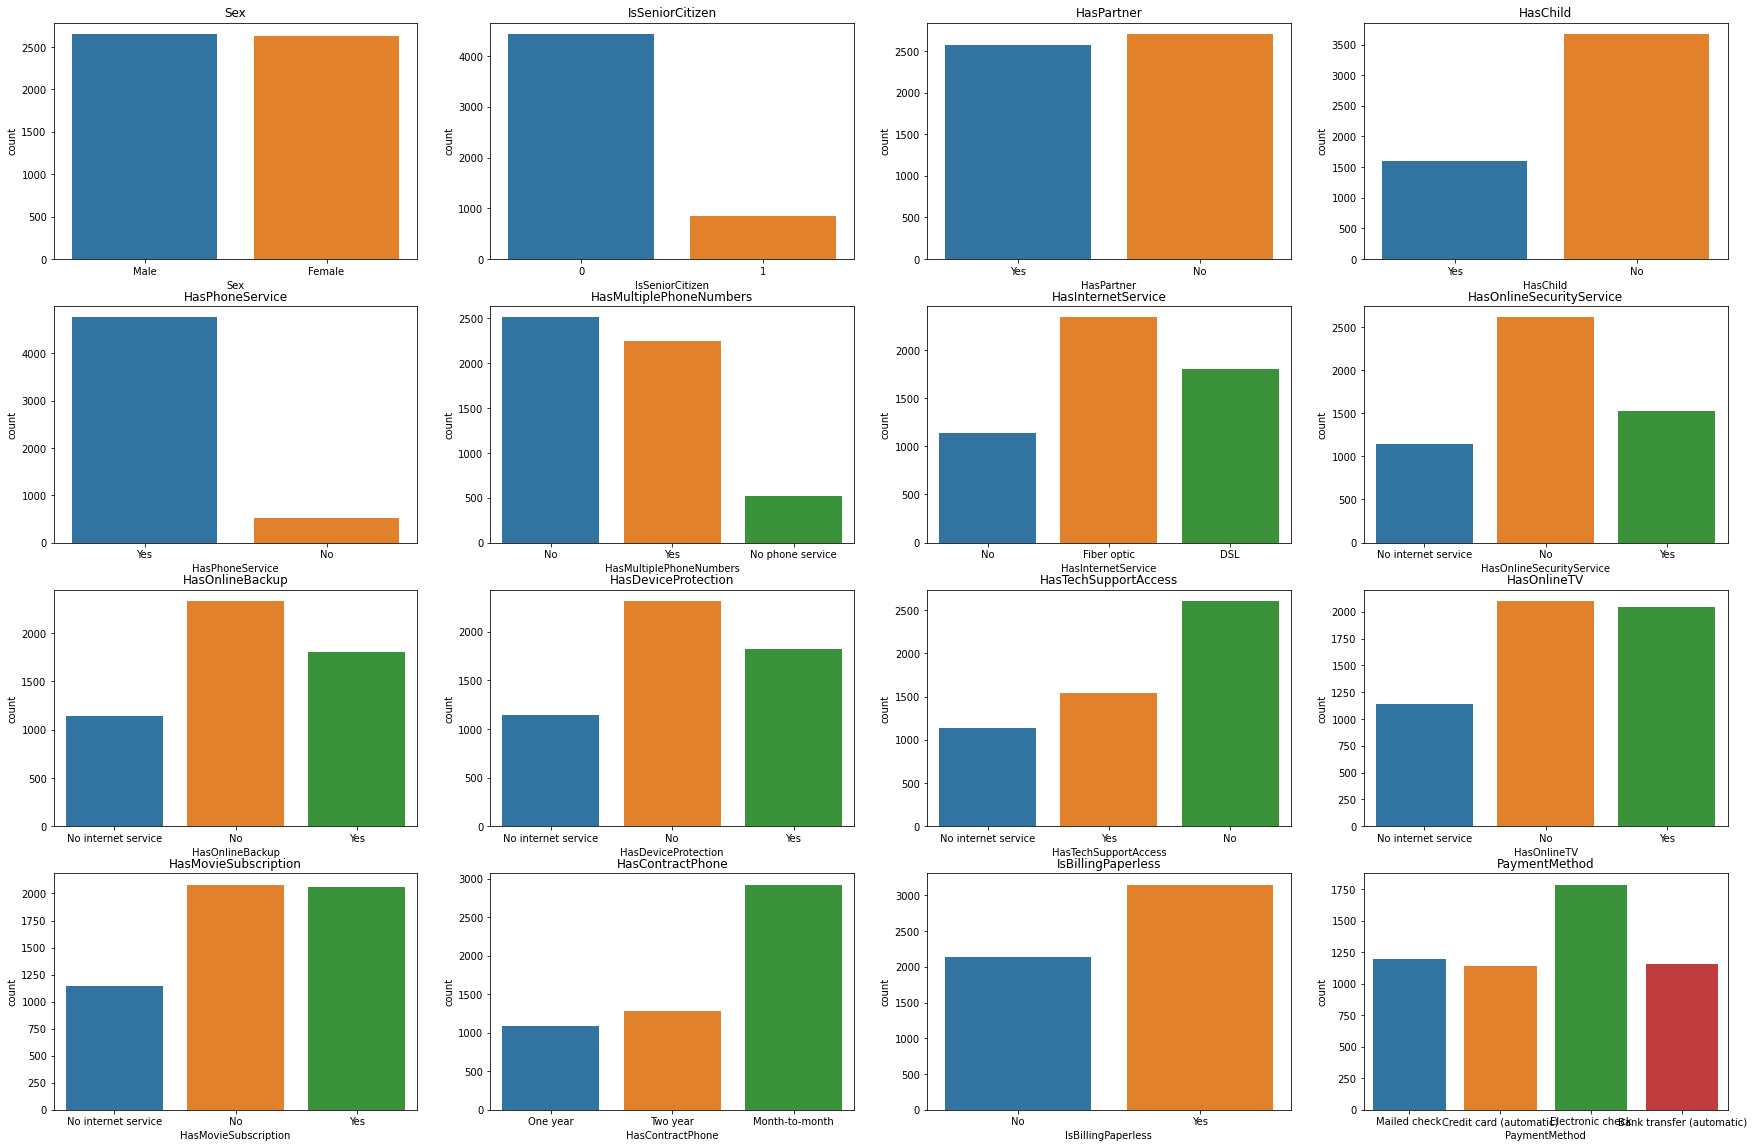

In [114]:
fig, axs = plt.subplots(4, 4, figsize=[30, 20])
for ax, col in zip(axs.flatten(), cat_cols):
    labels, x = zip(*data[col].value_counts().items())
    # ax.pie(x, labels=labels, autopct='%1.1f%%')
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(col)

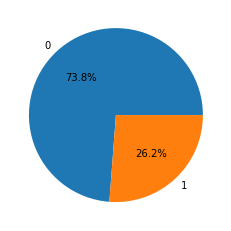

In [84]:
labels, x = zip(*data[target_col].value_counts().items())
plt.pie(x, labels=labels, autopct='%1.1f%%');

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [596]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from itertools import zip_longest

In [779]:
class MyTransformer():
    def __init__(self, num_cols, cat_cols):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, data):
        num_cols = list(set(self.num_cols).intersection(set(data.columns)))
        cat_cols = list(set(self.cat_cols).intersection(set(data.columns)))
        data = data.copy(deep=True)
        data = data.reset_index()
        
        for col in num_cols:
            data[col] = pd.to_numeric(data[col], errors='coerce')
            data.loc[data[col].isna(), col] = data[col].mean()
        data[num_cols] = StandardScaler().fit_transform(data[num_cols])
        
        for col in cat_cols:
        data[col] = data[col].astype('category')
        cat_df = pd.DataFrame(OneHotEncoder().fit_transform(data[cat_cols]).toarray())
        data = data.drop(columns=cat_cols)
        data = data.join(cat_df)
        return data

transformer = MyTransformer(num_cols, cat_cols)
# transformed_data = transformer.transform(data)

clf = LogisticRegression(max_iter=1000)
clf = Pipeline(steps=[('transformer', transformer), ('estimator', clf)])

In [781]:
class MyCV_splitter():
    def __init__(self, n_splits=5):
        self.n_splits = n_splits
        self.test_size = 1 / n_splits
    
    def split(self, X, *args):
        n_samples = X.shape[0]        
        rng = np.random.default_rng()
        perm = rng.permutation(np.arange(n_samples))
        perm = np.arange(n_samples)
        
        remainder = n_samples % self.n_splits
        div = n_samples // self.n_splits
        n_test_samples = []
        for _ in np.arange(self.n_splits):
            n_test_samples.append(div + remainder // self.n_splits)
            remainder %= self.n_splits
            remainder += n_samples % self.n_splits
        
        print(np.array(n_test_samples).cumsum())
        idxs = np.cumsum(n_test_samples)
        print(idxs)
        for l, r in zip([None] + idxs[:-1].tolist(), idxs):            
            print(l, r)
            mask = np.zeros(n_samples, dtype='bool')
            mask[l : r] = True
            yield perm[~mask], perm[mask]
            
    def get_n_splits(self, *args):
        return self.n_splits

splitter = MyCV_splitter()

In [749]:
from sklearn.model_selection import KFold
cv = KFold()
for split in cv.split(X_all):
    print(split)

(array([1057, 1058, 1059, ..., 5279, 5280, 5281]), array([   0,    1,    2, ..., 1054, 1055, 1056]))
(array([   0,    1,    2, ..., 5279, 5280, 5281]), array([1057, 1058, 1059, ..., 2111, 2112, 2113]))
(array([   0,    1,    2, ..., 5279, 5280, 5281]), array([2114, 2115, 2116, ..., 3167, 3168, 3169]))
(array([   0,    1,    2, ..., 5279, 5280, 5281]), array([3170, 3171, 3172, ..., 4223, 4224, 4225]))
(array([   0,    1,    2, ..., 4223, 4224, 4225]), array([4226, 4227, 4228, ..., 5279, 5280, 5281]))


In [736]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
print(X_all.shape)
cv = KFold()
print(cv.get_n_splits(X_all))
cv = MyCV_splitter()
res = cross_validate(clf, X_all, y_all, scoring='roc_auc', cv=cv)
res['test_score'].mean()

(5282, 19)
5
[1056 2112 3169 4225 5282]
[1056 2112 3169 4225 5282]
None 1056
1056 2112
2112 3169
3169 4225
4225 5282


0.8408790758806562

In [849]:
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.1)
param_grid = {
    'estimator__C' : np.logspace(l := -3, r := 2, r - l + 1)
}
gs = GridSearchCV(clf, param_grid=param_grid, scoring='roc_auc', cv=splitter)
res = gs.fit(X_all, y_all)
best_estimator = res.best_estimator_

[1056 2112 3169 4225 5282]
[1056 2112 3169 4225 5282]
None 1056
1056 2112
2112 3169
3169 4225
4225 5282


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [828]:
df = pd.DataFrame(res.cv_results_)
df = df.sort_values(by='rank_test_score')
df = df.filter(regex=('param_.*|mean_test_score|rank_test_score'))
df.columns = df.columns.str.replace('param_estimator__', '')
df

,C,mean_test_score,rank_test_score
5,100,0.842597,1
4,10,0.842275,2
2,0.1,0.841052,3
3,1,0.840879,4
1,0.01,0.840651,5
0,0.001,0.837565,6


In [831]:
y_pred = res.best_estimator_.predict_proba(X_val)
roc_auc_score(y_val, y_pred[:, 1])

0.8521526602744877

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [842]:
%load_ext pushmsg

%pushmsg -a my_key=o.jbo6fP56j8aEKjGHZ4uXdAExoHF9UjRe

In [844]:
%pushmsg "my long job just finished"

In [850]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100000)
model.fit(X_train, y_train, cat_cols, silent=True)
%pushmsg "catboost finished"

In [851]:
y_pred = model.predict_proba(X_val)
roc_auc_score(y_val, y_pred[:, 1])

0.8367875647668394

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [833]:
model.fit(X_all, y_all, cat_features=cat_cols, silent=True)

# Предсказания

In [834]:
best_model = model

In [835]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1761 non-null   int64  
 1   Churn   1761 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 27.6 KB


In [836]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)
submission['Churn']

0       0.034934
1       0.754834
2       0.650694
3       0.013341
4       0.002148
          ...   
1756    0.097707
1757    0.009151
1758    0.863323
1759    0.543360
1760    0.005431
Name: Churn, Length: 1761, dtype: float64

In [838]:
!kaggle competitions submit -c advanced-dls-fall-2020 -f my_submission.csv -m "catboost10000"

100%|██████████████████████████████████████| 41.5k/41.5k [00:02<00:00, 16.0kB/s]
Successfully submitted to Предсказание оттока пользователей (осень 2020)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.